In [1]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import shutil
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelBinarizer
import pickle

In [2]:
file = open('data_all.csv', 'rb')
data = pickle.load(file)
x_data,y_data =data
file.close()
# x_data = np.concatenate((x_data[0], x_data[1],x_data[2]),axis=0)
# y_data = np.concatenate((y_data[0], y_data[1],y_data[2]),axis= 0)

In [3]:
x_test = []
y_test = []
x_train = []
y_train = []
encoder = LabelBinarizer()
y_data=encoder.fit_transform(y_data[0])
x_train,x_test,y_train,y_test = train_test_split(x_data[0],y_data,test_size=0.3,random_state=68)

In [4]:
def show_history():

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)  
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(0, 1)
    plt.legend()

    plt.show()

In [23]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, LSTM, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard


input_shape = x_test[1].shape

model = Sequential()


# model.add(Conv2D(3, (3, 3), activation='relu', input_shape=input_shape))

# Lớp Convolution và Batch Normalization (BN) - Block 1
model.add(Conv2D(64, (3, 3), activation='relu', padding='same',input_shape=input_shape))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2 ,2)))

# Lớp Convolution và Batch Normalization (BN) - Block 2
# model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# model.add(BatchNormalization())
# model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2 ,2)))

# Lớp Convolution và Batch Normalization (BN) - Block 3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2 ,2)))

# # Lớp Convolution và Batch Normalization (BN) - Block 4
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2 ,2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2 ,2)))

# Lớp Convolution và Batch Normalization (BN) - Block 5
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())


model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Lớp Fully Connected
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_184 (Conv2D)         (None, 64, 64, 64)        640       
                                                                 
 batch_normalization_179 (B  (None, 64, 64, 64)        256       
 atchNormalization)                                              
                                                                 
 conv2d_185 (Conv2D)         (None, 64, 64, 64)        36928     
                                                                 
 batch_normalization_180 (B  (None, 64, 64, 64)        256       
 atchNormalization)                                              
                                                                 
 max_pooling2d_63 (MaxPooli  (None, 32, 32, 64)        0         
 ng2D)                                                           
                                                     

: 

Epoch 1/38
242/242 [==============================] - ETA: 0s - loss: 0.9209 - accuracy: 0.5756
Epoch 1: val_accuracy improved from -inf to 0.59378, saving model to best_model.h5
242/242 [==============================] - 24s 75ms/step - loss: 0.9209 - accuracy: 0.5756 - val_loss: 0.8337 - val_accuracy: 0.5938
Epoch 2/38
241/242 [============================>.] - ETA: 0s - loss: 0.7124 - accuracy: 0.6678
Epoch 2: val_accuracy did not improve from 0.59378
242/242 [==============================] - 17s 69ms/step - loss: 0.7121 - accuracy: 0.6679 - val_loss: 0.8751 - val_accuracy: 0.5905
Epoch 3/38
241/242 [============================>.] - ETA: 0s - loss: 0.6874 - accuracy: 0.6845
Epoch 3: val_accuracy improved from 0.59378 to 0.63274, saving model to best_model.h5
242/242 [==============================] - 17s 72ms/step - loss: 0.6873 - accuracy: 0.6846 - val_loss: 0.8710 - val_accuracy: 0.6327
Epoch 4/38
241/242 [============================>.] - ETA: 0s - loss: 0.6643 - accuracy: 0.69

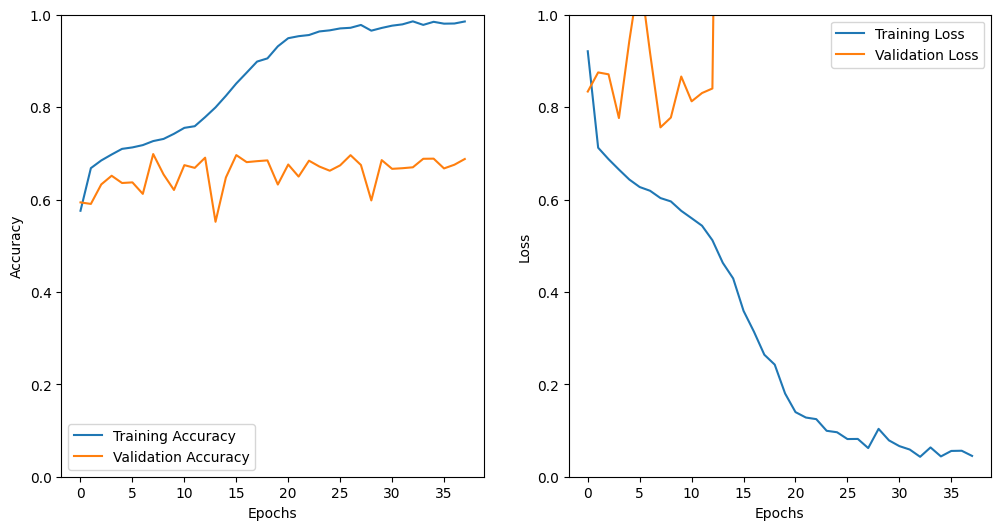

In [22]:
history = model.fit(x_train,y_train,batch_size=64, epochs=38,validation_data=(x_test, y_test), callbacks=[model_checkpoint])
show_history()